In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#loading and anlysing data
df=pd.read_csv("train1.csv")
df_copy = df.copy(deep=True)

In [248]:
#adding necessary columns 
#number of bathrooms
df["totalbathroom"]=df["FullBath"]+df["BsmtFullBath"]+df["BsmtHalfBath"]+df["HalfBath"]
#total area
df["TotalSF"] =df["GrLivArea"] + df["TotalBsmtSF"]
#latest edition
df["ledition"]=2025-df["YearBuilt"]


In [249]:
#dropping unnecessary features
list1=["LotArea","OverallQual","ExterQual","KitchenQual","Neighborhood","MSZoning","GarageCars","SalePrice","totalbathroom","TotalSF","ledition"]
list2=[feature for feature in df.columns if not feature in list1]
df.drop(list2,axis=1,inplace=True)
df

,MSZoning,LotArea,Neighborhood,OverallQual,ExterQual,KitchenQual,GarageCars,SalePrice,totalbathroom,TotalSF,ledition
0,RL,8450,CollgCr,7,Gd,Gd,2,208500,4,2566,22
1,RL,9600,Veenker,6,TA,TA,2,181500,3,2524,49
2,RL,11250,CollgCr,7,Gd,Gd,2,223500,4,2706,24
3,RL,9550,Crawfor,7,TA,Gd,3,140000,2,2473,110
4,RL,14260,NoRidge,8,Gd,Gd,3,250000,4,3343,25
...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Gilbert,6,TA,TA,2,175000,3,2600,26
1456,RL,13175,NWAmes,6,TA,TA,2,210000,3,3615,47
1457,RL,9042,Crawfor,7,Ex,Gd,1,266500,2,3492,84
1458,RL,9717,NAmes,5,TA,Gd,1,142125,2,2156,75


In [250]:
#to select the categorical data for description
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1460 non-null   str  
 1   LotArea        1460 non-null   int64
 2   Neighborhood   1460 non-null   str  
 3   OverallQual    1460 non-null   int64
 4   ExterQual      1460 non-null   str  
 5   KitchenQual    1460 non-null   str  
 6   GarageCars     1460 non-null   int64
 7   SalePrice      1460 non-null   int64
 8   totalbathroom  1460 non-null   int64
 9   TotalSF        1460 non-null   int64
 10  ledition       1460 non-null   int64
dtypes: int64(7), str(4)
memory usage: 125.6 KB


In [251]:
#displaying necessary stats (mean,max,median)
df.describe()

,LotArea,OverallQual,GarageCars,SalePrice,totalbathroom,TotalSF,ledition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1.767123,180921.195890,2.430822,2572.893151,53.732192
std,9981.264932,1.382997,0.747315,79442.502883,0.922647,823.598492,30.202904
min,1300.000000,1.000000,0.000000,34900.000000,1.000000,334.000000,15.000000
25%,7553.500000,5.000000,1.000000,129975.000000,2.000000,2014.000000,25.000000
50%,9478.500000,6.000000,2.000000,163000.000000,2.000000,2479.000000,52.000000
75%,11601.500000,7.000000,2.000000,214000.000000,3.000000,3008.500000,71.000000
max,215245.000000,10.000000,4.000000,755000.000000,6.000000,11752.000000,153.000000


In [252]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [253]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [254]:
df["ExterQual"].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [255]:
df["KitchenQual"].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [256]:
pr=df.isna().sum()
for i in range(0,10):
    if pr.values[i] !=0 :
        print(f"we have missinge valus in {pr.index[i]}")
    else:
         print("no nan values")
#no features to hundle its missing values 

no nan values
no nan values
no nan values
no nan values
no nan values
no nan values
no nan values
no nan values
no nan values
no nan values


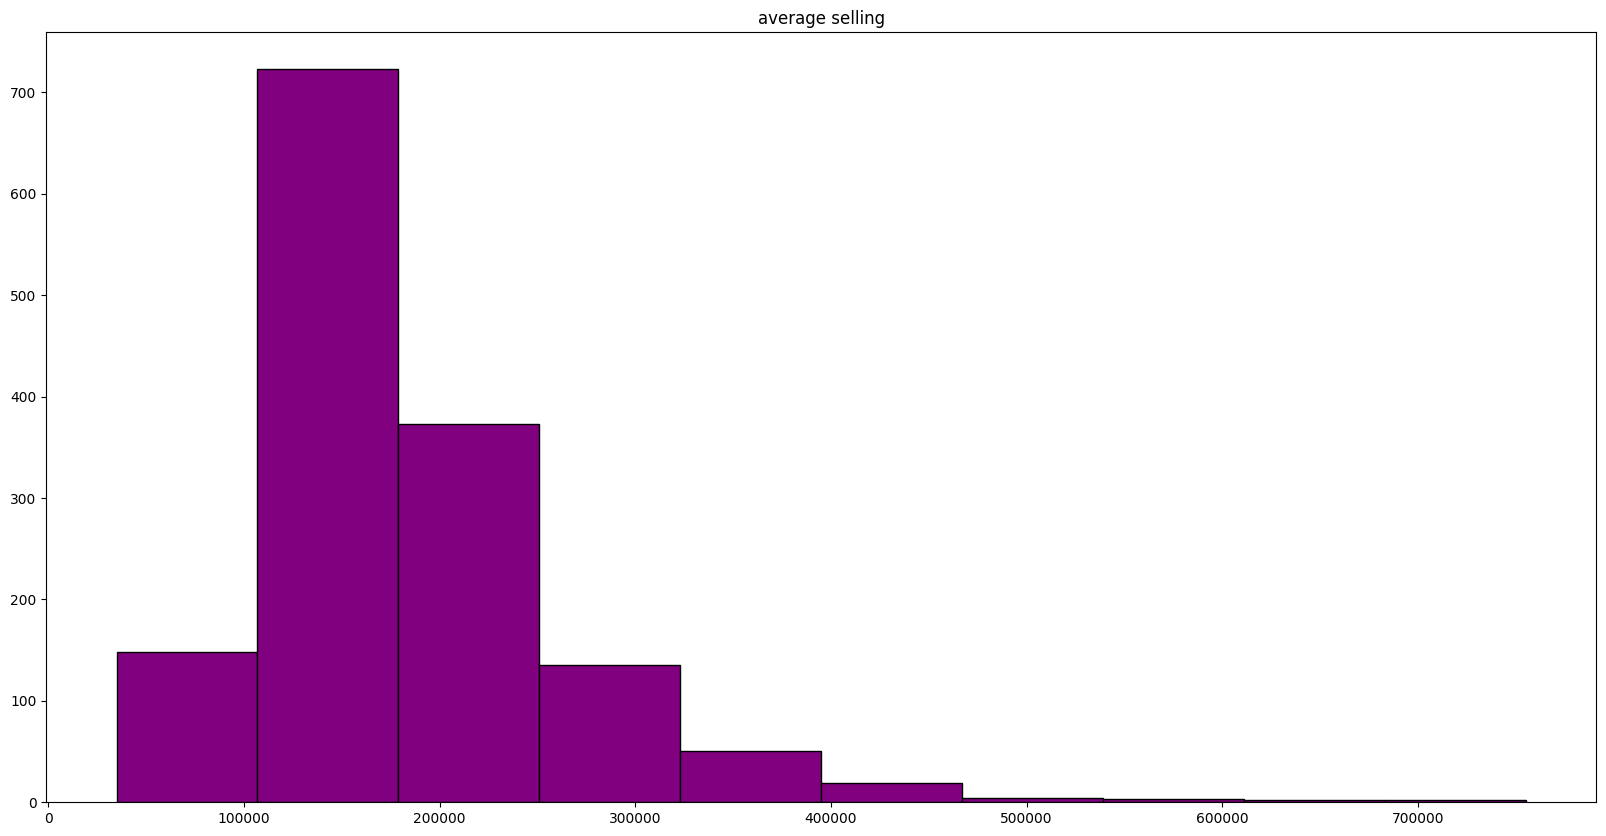

In [257]:
#ploting features
#we draw a histogarm to show the most price given for those houses appearence :
plt.figure(figsize=(20,10))#we create with dimensions we want the paper where we draw 
plt.hist(df['SalePrice'],bins=10,color="Purple",edgecolor='Black')#drawing a histo
plt.title("average selling")
plt.show()


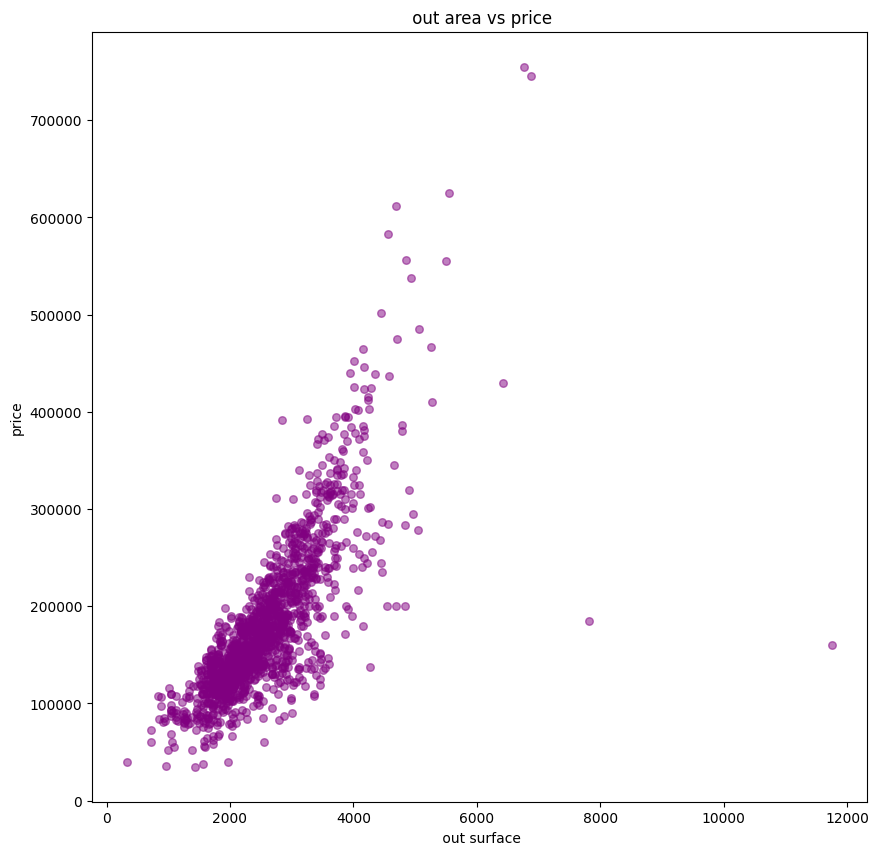

In [258]:
# area vs price
plt.figure(figsize=(10,10))
plt.scatter(df["TotalSF"], df["SalePrice"], 
            alpha=0.5, color='purple', s=30, label='house')
plt.xlabel(" out surface")
plt.ylabel("price")
plt.title(" out area vs price")
plt.show()
# as we see hare , the house price increases with the surface increasing

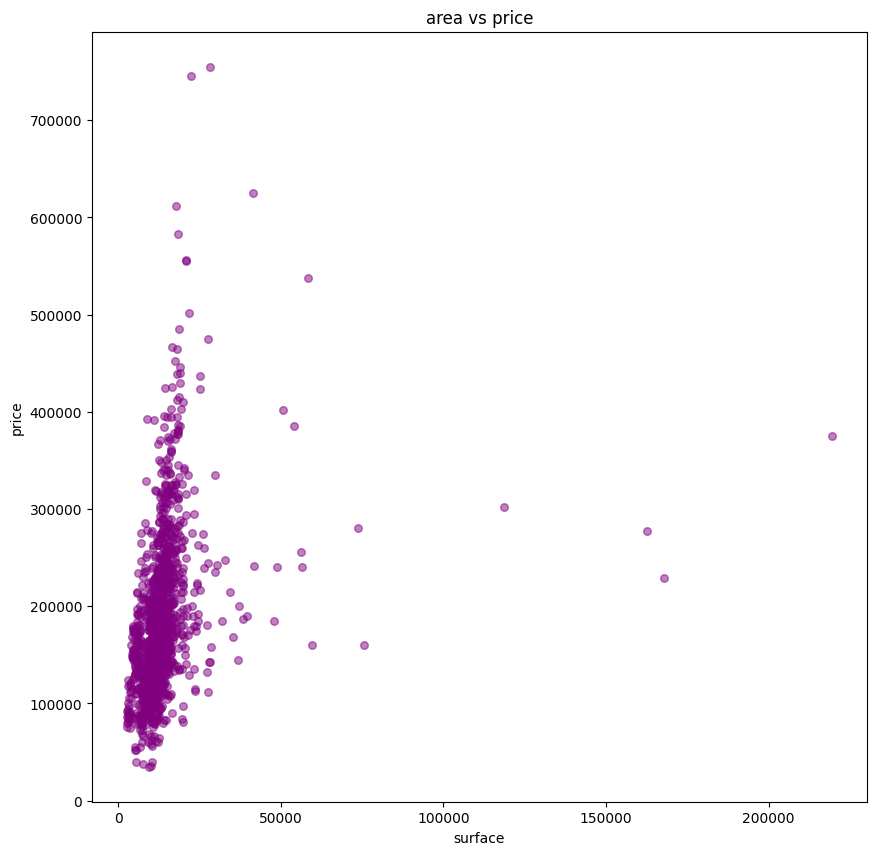

In [259]:
# total area vs price
plt.figure(figsize=(10,10))
plt.scatter(df["TotalSF"]+df["LotArea"], df["SalePrice"], 
            alpha=0.5, color='purple', s=30, label='house')
plt.xlabel("surface")
plt.ylabel("price")
plt.title("area vs price")
plt.show()
#as we see hare the house price gets increasing even if the area is as constant , which means that there is other factors that affects the house pricing!

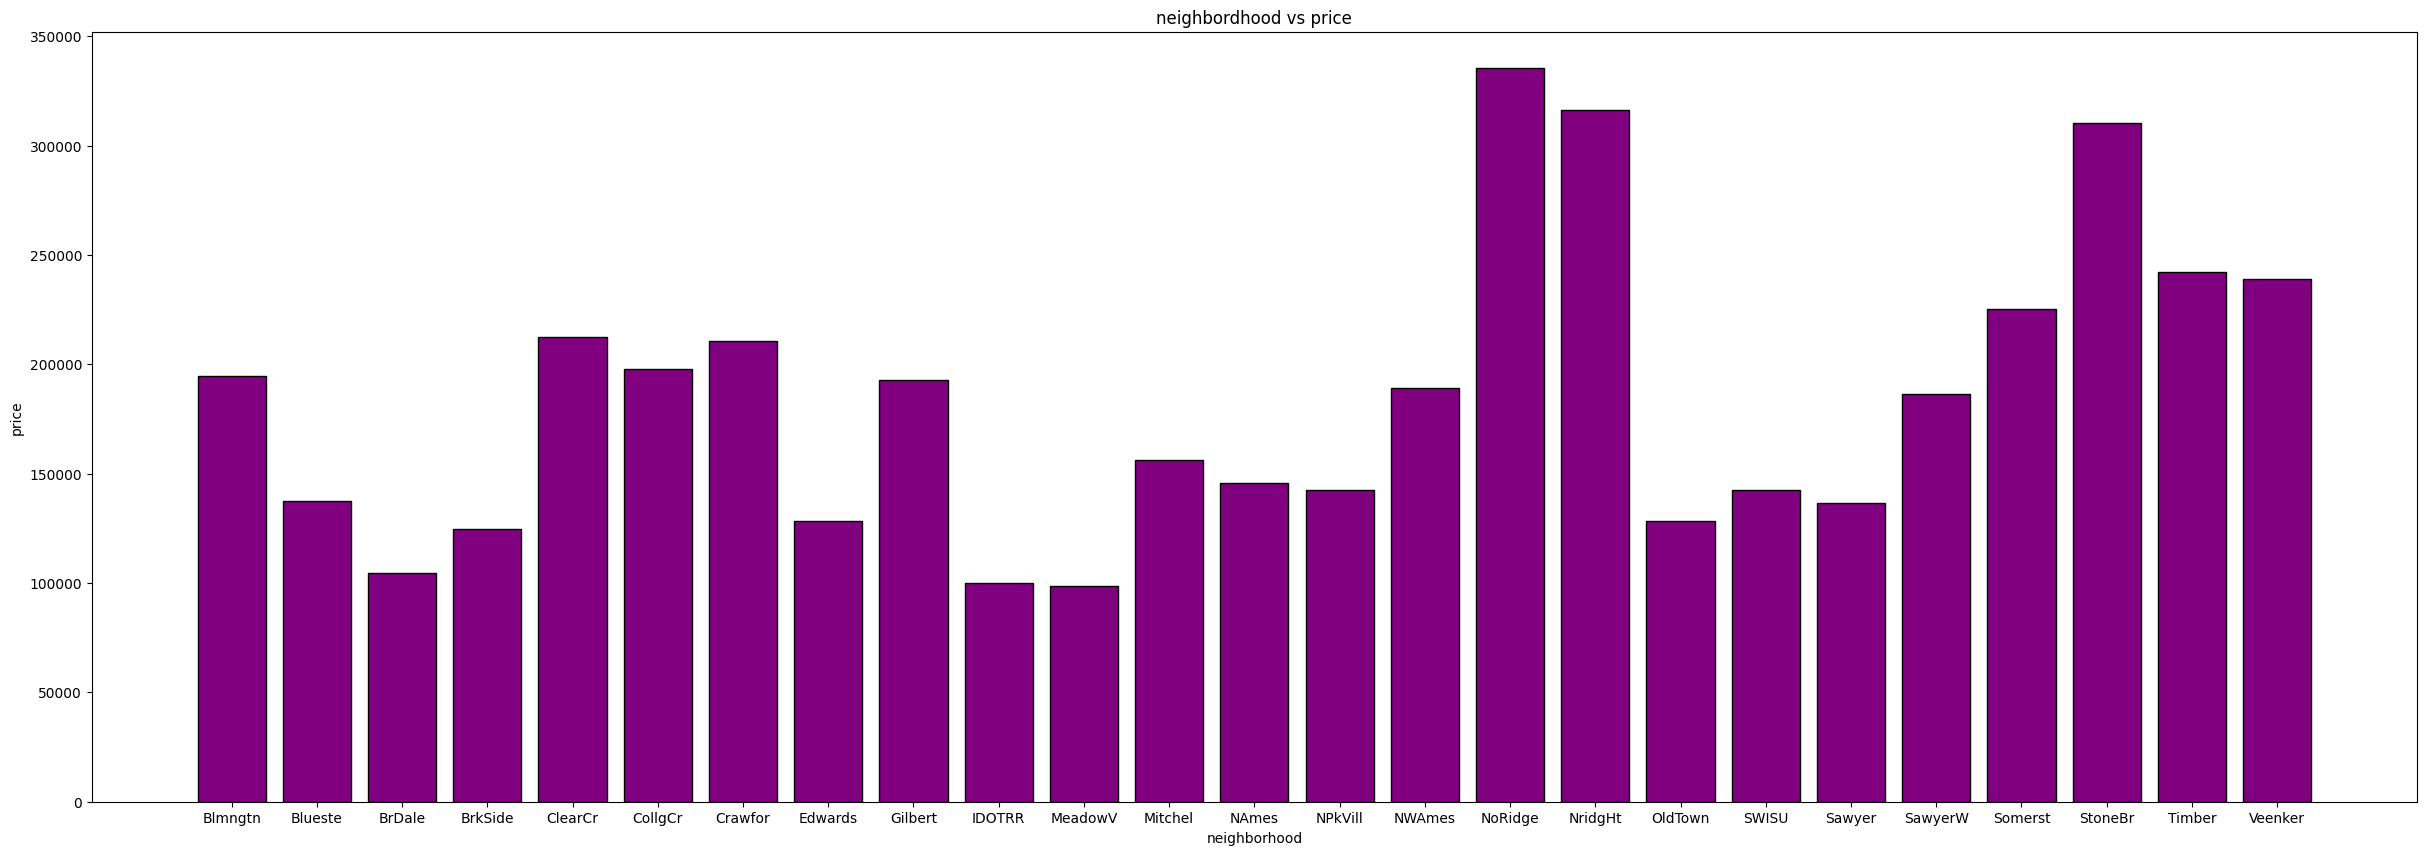

In [260]:
#seeing the  most recommended Neighborhood place for the price measuring
plt.figure(figsize=(30,10))
pt=df.groupby("Neighborhood")["SalePrice"].mean()
plt.bar(pt.index,pt.values,color="purple",edgecolor="black")
plt.xlabel("neighborhood")
plt.ylabel("price")
plt.title("neighbordhood vs price")
plt.show()

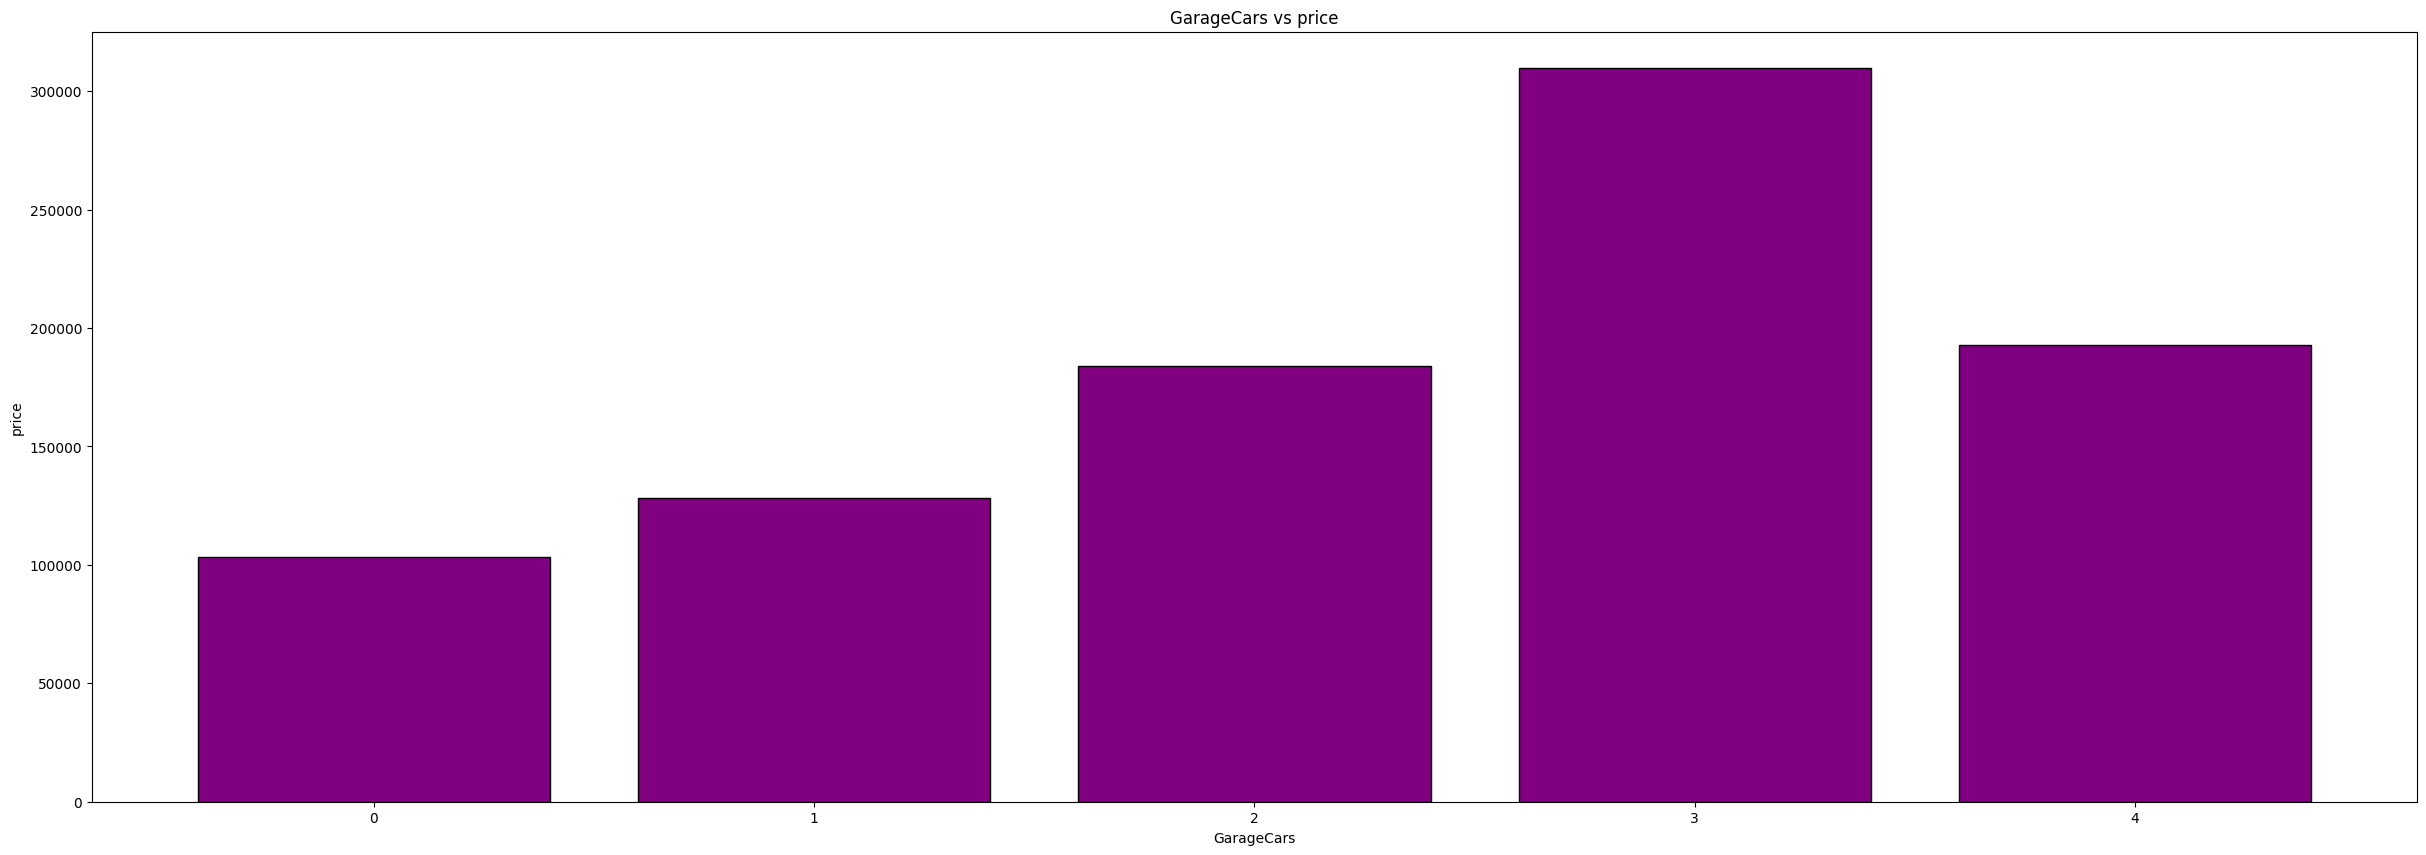

In [261]:
#the role of the garage capacity on the house price
plt.figure(figsize=(30,10))
pt=df.groupby("GarageCars")["SalePrice"].mean()
plt.bar(pt.index,pt.values,color="purple",edgecolor="black")
plt.xlabel("GarageCars")
plt.ylabel("price")
plt.title("GarageCars vs price")
plt.show()

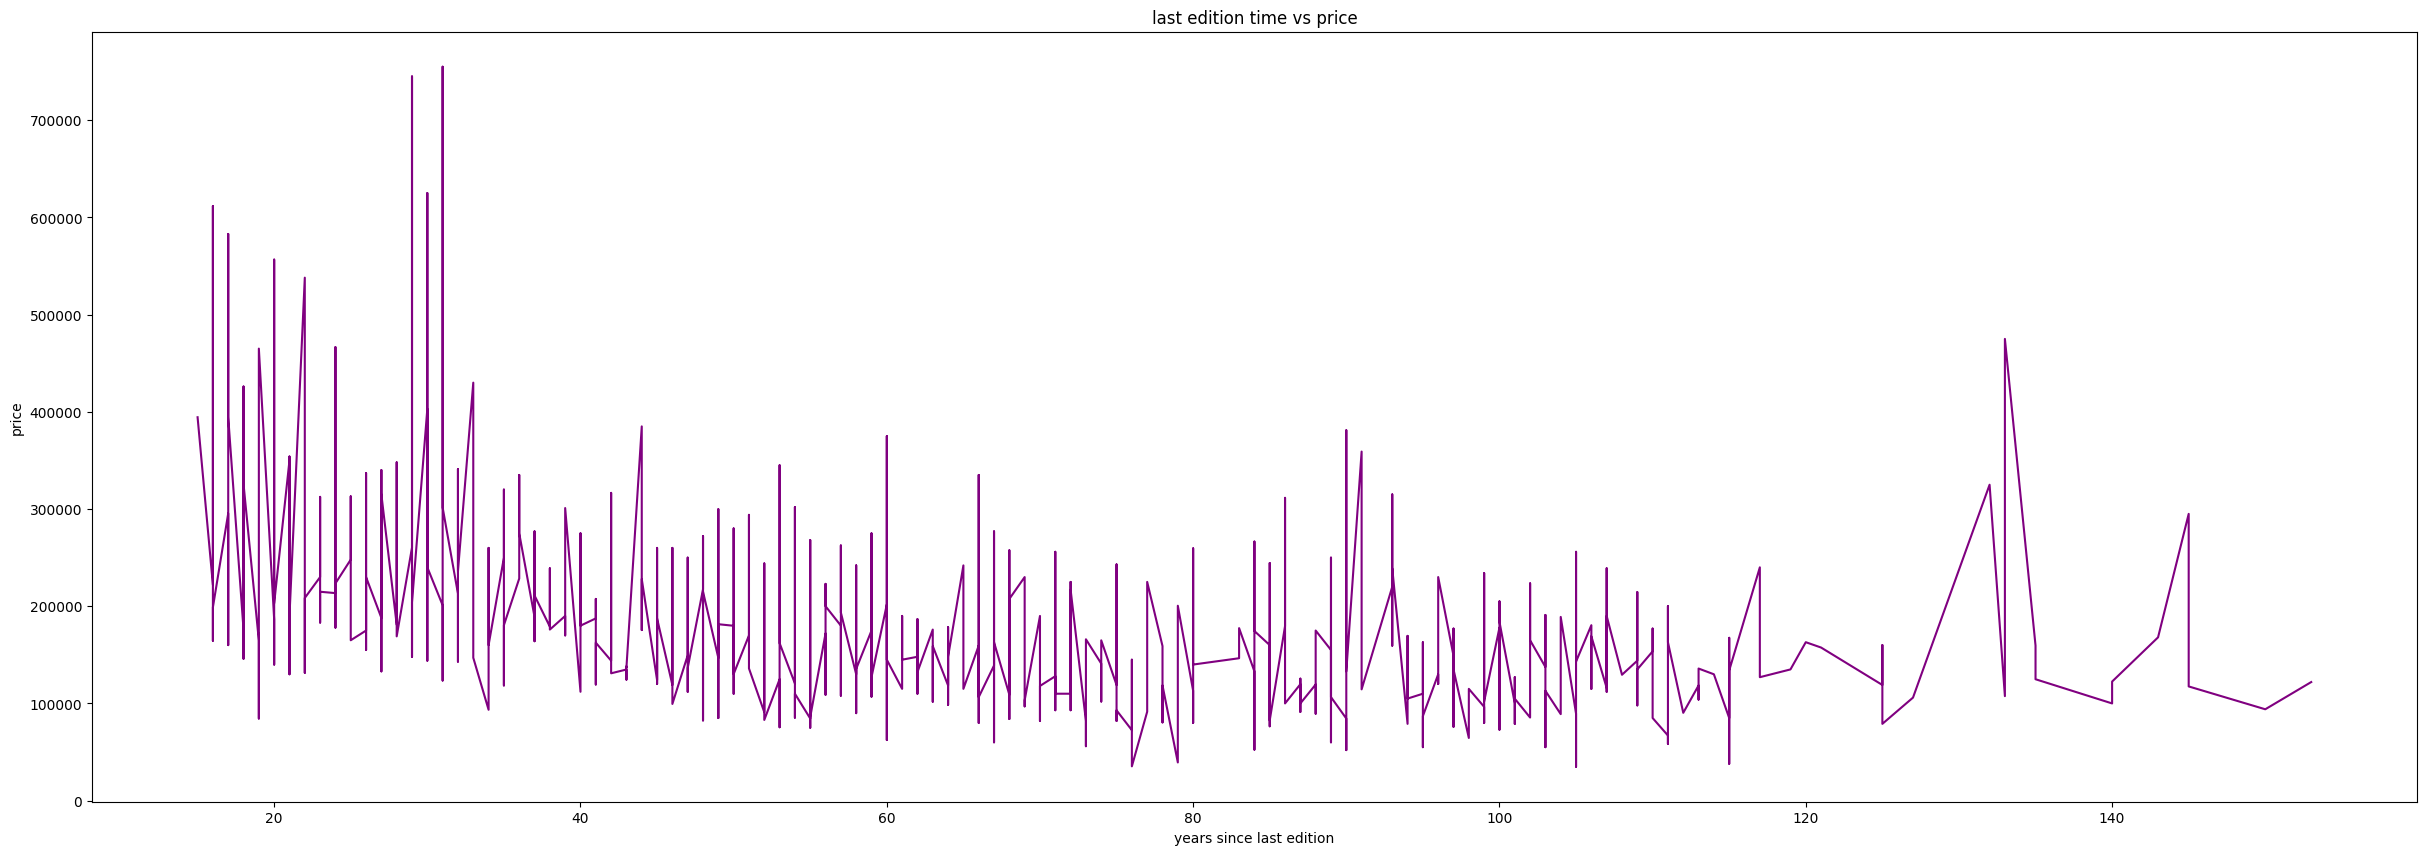

In [262]:
#the state of the house(new,prenew, old)
plt.figure(figsize=(30,10))
p1=df.sort_values("ledition")
plt.plot(p1["ledition"],p1["SalePrice"],color="purple")
plt.xlabel("years since last edition")
plt.ylabel("price")
plt.title("last edition time vs price")
plt.show()
#we notice that lats edited houses are more expensive !

In [263]:
#encoding categorical data

# one hot : MSZoning ,Neighborhood (non classificational features)
df1 = pd.get_dummies(df, columns=["MSZoning"])
cols_to_add = df1.iloc[:, 10:].columns
for col in cols_to_add:
    df[col] = df1[col].astype(int)
#we remove the feature now 
df.drop(["MSZoning"],axis=1,inplace=True)
df

,LotArea,Neighborhood,OverallQual,ExterQual,KitchenQual,GarageCars,SalePrice,totalbathroom,TotalSF,ledition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,CollgCr,7,Gd,Gd,2,208500,4,2566,22,0,0,0,1,0
1,9600,Veenker,6,TA,TA,2,181500,3,2524,49,0,0,0,1,0
2,11250,CollgCr,7,Gd,Gd,2,223500,4,2706,24,0,0,0,1,0
3,9550,Crawfor,7,TA,Gd,3,140000,2,2473,110,0,0,0,1,0
4,14260,NoRidge,8,Gd,Gd,3,250000,4,3343,25,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Gilbert,6,TA,TA,2,175000,3,2600,26,0,0,0,1,0
1456,13175,NWAmes,6,TA,TA,2,210000,3,3615,47,0,0,0,1,0
1457,9042,Crawfor,7,Ex,Gd,1,266500,2,3492,84,0,0,0,1,0
1458,9717,NAmes,5,TA,Gd,1,142125,2,2156,75,0,0,0,1,0


In [264]:
df1 = pd.get_dummies(df, columns=["Neighborhood"])
cols_to_add = df1.iloc[:, 15:].columns
for col in cols_to_add:
    df[col] = df1[col].astype(int)
df.drop(["Neighborhood"],axis=1,inplace=True)
df

,LotArea,OverallQual,ExterQual,KitchenQual,GarageCars,SalePrice,totalbathroom,TotalSF,ledition,MSZoning_C (all),...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450,7,Gd,Gd,2,208500,4,2566,22,0,...,0,0,0,0,0,0,0,0,0,0
1,9600,6,TA,TA,2,181500,3,2524,49,0,...,0,0,0,0,0,0,0,0,0,1
2,11250,7,Gd,Gd,2,223500,4,2706,24,0,...,0,0,0,0,0,0,0,0,0,0
3,9550,7,TA,Gd,3,140000,2,2473,110,0,...,0,0,0,0,0,0,0,0,0,0
4,14260,8,Gd,Gd,3,250000,4,3343,25,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,TA,TA,2,175000,3,2600,26,0,...,0,0,0,0,0,0,0,0,0,0
1456,13175,6,TA,TA,2,210000,3,3615,47,0,...,0,0,0,0,0,0,0,0,0,0
1457,9042,7,Ex,Gd,1,266500,2,3492,84,0,...,0,0,0,0,0,0,0,0,0,0
1458,9717,5,TA,Gd,1,142125,2,2156,75,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
# label :KitchenQual ,ExterQual (classificational features)
df["KitchenQual"]=LabelEncoder().fit_transform(df[["KitchenQual"]])
df["ExterQual"]=LabelEncoder().fit_transform(df[["ExterQual"]])
df

c:\Users\PC\Desktop\sara\my projects\diebitic_analysis\venv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC\Desktop\sara\my projects\diebitic_analysis\venv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LotArea,OverallQual,ExterQual,KitchenQual,GarageCars,SalePrice,totalbathroom,TotalSF,ledition,MSZoning_C (all),...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450,7,2,2,2,208500,4,2566,22,0,...,0,0,0,0,0,0,0,0,0,0
1,9600,6,3,3,2,181500,3,2524,49,0,...,0,0,0,0,0,0,0,0,0,1
2,11250,7,2,2,2,223500,4,2706,24,0,...,0,0,0,0,0,0,0,0,0,0
3,9550,7,3,2,3,140000,2,2473,110,0,...,0,0,0,0,0,0,0,0,0,0
4,14260,8,2,2,3,250000,4,3343,25,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,3,3,2,175000,3,2600,26,0,...,0,0,0,0,0,0,0,0,0,0
1456,13175,6,3,3,2,210000,3,3615,47,0,...,0,0,0,0,0,0,0,0,0,0
1457,9042,7,0,2,1,266500,2,3492,84,0,...,0,0,0,0,0,0,0,0,0,0
1458,9717,5,3,2,1,142125,2,2156,75,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
#scaling :we scale features to make the model avoid prefering a feature over another one .
#we are not gonna work with neuralnetworking that uses the normalization , so we are gonna use the standardization:
# i scaled those two cuz there valuses are so gient coparing to the other ones.
df["LotArea"]=StandardScaler().fit_transform(df[["LotArea"]])
df["TotalSF"]=StandardScaler().fit_transform(df[["TotalSF"]])
df

,LotArea,OverallQual,ExterQual,KitchenQual,GarageCars,SalePrice,totalbathroom,TotalSF,ledition,MSZoning_C (all),...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.207142,7,2,2,2,208500,4,-0.008372,22,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.091886,6,3,3,2,181500,3,-0.059386,49,0,...,0,0,0,0,0,0,0,0,0,1
2,0.073480,7,2,2,2,223500,4,0.161672,24,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.096897,7,3,2,3,140000,2,-0.121330,110,0,...,0,0,0,0,0,0,0,0,0,0
4,0.375148,8,2,2,3,250000,4,0.935372,25,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,6,3,3,2,175000,3,0.032924,26,0,...,0,0,0,0,0,0,0,0,0,0
1456,0.266407,6,3,3,2,210000,3,1.265743,47,0,...,0,0,0,0,0,0,0,0,0,0
1457,-0.147810,7,0,2,1,266500,2,1.116347,84,0,...,0,0,0,0,0,0,0,0,0,0
1458,-0.080160,5,3,2,1,142125,2,-0.506358,75,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
#comparaison between the cleaned data set and the primery one
df

,LotArea,OverallQual,ExterQual,KitchenQual,GarageCars,SalePrice,totalbathroom,TotalSF,ledition,MSZoning_C (all),...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.207142,7,2,2,2,208500,4,-0.008372,22,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.091886,6,3,3,2,181500,3,-0.059386,49,0,...,0,0,0,0,0,0,0,0,0,1
2,0.073480,7,2,2,2,223500,4,0.161672,24,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.096897,7,3,2,3,140000,2,-0.121330,110,0,...,0,0,0,0,0,0,0,0,0,0
4,0.375148,8,2,2,3,250000,4,0.935372,25,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,6,3,3,2,175000,3,0.032924,26,0,...,0,0,0,0,0,0,0,0,0,0
1456,0.266407,6,3,3,2,210000,3,1.265743,47,0,...,0,0,0,0,0,0,0,0,0,0
1457,-0.147810,7,0,2,1,266500,2,1.116347,84,0,...,0,0,0,0,0,0,0,0,0,0
1458,-0.080160,5,3,2,1,142125,2,-0.506358,75,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
df_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#we see that we got the high quility data :less & efficent & only_needed features what makes our model efficent & accurate
#and the answer of the question if we did not clean and prepared the data: as we see , the primery data set was messy & full of noisy data and lack what we need so we were
#getting garbage model cuz garbage data gives garbage model

In [270]:
#spliting data into train dataset and test data set 
y=df["SalePrice"]
df.drop(["SalePrice"],axis=1,inplace=True)
x_train,x_test,y_train,y_test=train_test_split( df,y,test_size=0.25,random_state=42)
#we split data to provide a data set for the model to learn patterns from it then we test it on data set that it never saw before to ensure that it  well learned the linking 
#and mapping between features and output.

In [271]:
#summary:
#1:importing the dataset , then i identified the main needed  also features we lack,i added the features that the model needs the i dropped the unnecessary features
#2:displaying the necessary stats of the data frame ,also the categorical columns to get general view on   imported data 
#3:identifiying columns with miising values to fill them(which is not the case here,and if it was , we fill by
# :1 mean if non time serie data+ no outliners,2 if there is outliners we fill with the median,3 with ffill() or bfill() or interpolate() in time_serie case )
#4:plot some relations between features and the targeted output 
#5:encoding categorical data : LabelEncoder for classificational feature , One_Hot_Line otherwise
#6:scaling features with huge valued data :using standardization cuz we are not gonna build a neuralnetwork
#7:splitting dataset to training set and testing set 